# Compare Embedding Models

In [3]:
%pip install -qU httpx sentence-transformers faiss

In [4]:
import json
import httpx
import os
import pandas as pd
import polars as pl

from uptrain.operators import CsvReader, JsonReader, VectorSearch
from uptrain import Settings, EvalLLM, APIClient, Evals

/usr/local/lib/python3.10/dist-packages/lazy_loader/__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)


In [5]:
settings = Settings(
    uptrain_access_token="up-cf16f604d06b42f282d76bc46f448b9e"
)

eval_client = APIClient(settings = settings)

## Define all the experiment parameters

In [6]:
embedding_models = ['MiniLM-L6-v2', 'mpnet-base-v2', 'all-distilroberta-v1']
top_k = 5
distance_metric = "l2_distance"
experiment_name = "Embedding-Models-Experiment"

## Read the queries and documents

In [7]:
# Download the queries
queries_url = "https://uptrain-assets.s3.ap-south-1.amazonaws.com/data/fiqa_queries_select.jsonl"
queries_path = os.path.join('./', "fiqa_queries_select.jsonl")

if not os.path.exists(queries_path):
    r = httpx.get(queries_url)
    with open(queries_path, "wb") as f:
        f.write(r.content)

queries = pl.read_ndjson("fiqa_queries_select.jsonl")


# Download the documents
documents_url = "https://uptrain-assets.s3.ap-south-1.amazonaws.com/data/fiqa_documents_select.csv"
documents_path = os.path.join('./', "fiqa_documents_select.csv")

if not os.path.exists(documents_path):
    r = httpx.get(documents_url)
    with open(documents_path, "wb") as f:
        f.write(r.content)

documents = pl.read_csv("fiqa_documents_select.csv")["document"].to_list()

## Retrieve the top k documents for each query

In [8]:
top_k_documents = pl.DataFrame()

for embedding_model in embedding_models:
    results = VectorSearch(embeddings_model=embedding_model,
                           top_k=top_k,
                           col_in_query="question",
                           col_in_document="document",
                           documents=documents,
                           distance_metric=distance_metric).setup(settings).run(queries)["output"]
    results = results.with_columns([pl.lit(embedding_model).alias("embedding_model")])
    top_k_documents = pl.concat([top_k_documents, results])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
2024-04-01 10:40:03.623 | INFO     | uptrain.operators.embedding.embedding:run:219 - Running batch: 0 out of 42 for operator Embedding
2024-04-01 10:40:03.968 | INFO     | uptrain.operators.embedding.embedding:run:219 - Running batch: 1 out of 42 for operator Embedding
2024-04-01 10:40:04.248 | INFO     | uptrain.operators.embedding.embedding:run:219 - Running batch: 2 out of 42 for operator Embedding
2024-04-01 10:40:04.517 | INFO     | uptrain.operators.embedding.embedding:r

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2024-04-01 10:40:24.384 | INFO     | uptrain.operators.embedding.embedding:run:219 - Running batch: 0 out of 42 for operator Embedding
2024-04-01 10:40:25.032 | INFO     | uptrain.operators.embedding.embedding:run:219 - Running batch: 1 out of 42 for operator Embedding
2024-04-01 10:40:25.717 | INFO     | uptrain.operators.embedding.embedding:run:219 - Running batch: 2 out of 42 for operator Embedding
2024-04-01 10:40:26.439 | INFO     | uptrain.operators.embedding.embedding:run:219 - Running batch: 3 out of 42 for operator Embedding
2024-04-01 10:40:27.239 | INFO     | uptrain.operators.embedding.embedding:run:219 - Running batch: 4 out of 42 for operator Embedding
2024-04-01 10:40:28.013 | INFO     | uptrain.operators.embedding.embedding:run:219 - Running batch: 5 out of 42 for operator Embedding
2024-04-01 10:40:28.674 | INFO     | uptrain.operators.embedding.embedding:run:219 - Running batch: 6 out of 42 for operator Embedding
2024-04-01 10:40:29.389 | INFO     | uptrain.operators.

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2024-04-01 10:41:03.488 | INFO     | uptrain.operators.embedding.embedding:run:219 - Running batch: 0 out of 42 for operator Embedding
2024-04-01 10:41:03.957 | INFO     | uptrain.operators.embedding.embedding:run:219 - Running batch: 1 out of 42 for operator Embedding
2024-04-01 10:41:04.436 | INFO     | uptrain.operators.embedding.embedding:run:219 - Running batch: 2 out of 42 for operator Embedding
2024-04-01 10:41:04.880 | INFO     | uptrain.operators.embedding.embedding:run:219 - Running batch: 3 out of 42 for operator Embedding
2024-04-01 10:41:05.273 | INFO     | uptrain.operators.embedding.embedding:run:219 - Running batch: 4 out of 42 for operator Embedding
2024-04-01 10:41:05.659 | INFO     | uptrain.operators.embedding.embedding:run:219 - Running batch: 5 out of 42 for operator Embedding
2024-04-01 10:41:06.058 | INFO     | uptrain.operators.embedding.embedding:run:219 - Running batch: 6 out of 42 for operator Embedding
2024-04-01 10:41:06.470 | INFO     | uptrain.operators.

In [9]:
results = eval_client.evaluate_experiments(
    experiment_name,
    data = top_k_documents,
    checks = [Evals.CONTEXT_RELEVANCE],
    exp_columns = ['embedding_model'],
    metadata = {"uptrain_index_columns": ['question', 'retrieval_rank']}
)

2024-04-01 10:41:21.664 | INFO     | uptrain.framework.remote:log_and_evaluate:669 - Sending evaluation request for rows 0 to <50 to the Uptrain server
2024-04-01 10:41:43.813 | INFO     | uptrain.framework.remote:log_and_evaluate:669 - Sending evaluation request for rows 50 to <100 to the Uptrain server
2024-04-01 10:42:12.790 | INFO     | uptrain.framework.remote:log_and_evaluate:669 - Sending evaluation request for rows 100 to <150 to the Uptrain server
2024-04-01 10:42:50.607 | INFO     | uptrain.framework.remote:log_and_evaluate:669 - Sending evaluation request for rows 150 to <200 to the Uptrain server
2024-04-01 10:43:16.171 | INFO     | uptrain.framework.remote:log_and_evaluate:669 - Sending evaluation request for rows 200 to <250 to the Uptrain server
2024-04-01 10:43:38.115 | INFO     | uptrain.framework.remote:log_and_evaluate:669 - Sending evaluation request for rows 250 to <300 to the Uptrain server


In [10]:
results

[{'question': 'Do I need to pay taxes in India?',
  'retrieval_rank': 1,
  'retrieval_rank_embedding_model_MiniLM-L6-v2': 1,
  'retrieval_rank_embedding_model_mpnet-base-v2': 1,
  'retrieval_rank_embedding_model_all-distilroberta-v1': 1,
  'context_embedding_model_MiniLM-L6-v2': 'Yes you need to pay taxes in India. Show this as other income and pay tax according to your tax bracket. Note you need to pay the taxes quarterly if the net tax payable is more than 10,000.',
  'context_embedding_model_mpnet-base-v2': 'Yes you need to pay taxes in India. Show this as other income and pay tax according to your tax bracket. Note you need to pay the taxes quarterly if the net tax payable is more than 10,000.',
  'context_embedding_model_all-distilroberta-v1': 'Yes you need to pay taxes in India. Show this as other income and pay tax according to your tax bracket. Note you need to pay the taxes quarterly if the net tax payable is more than 10,000.',
  'score_context_relevance_embedding_model_MiniL

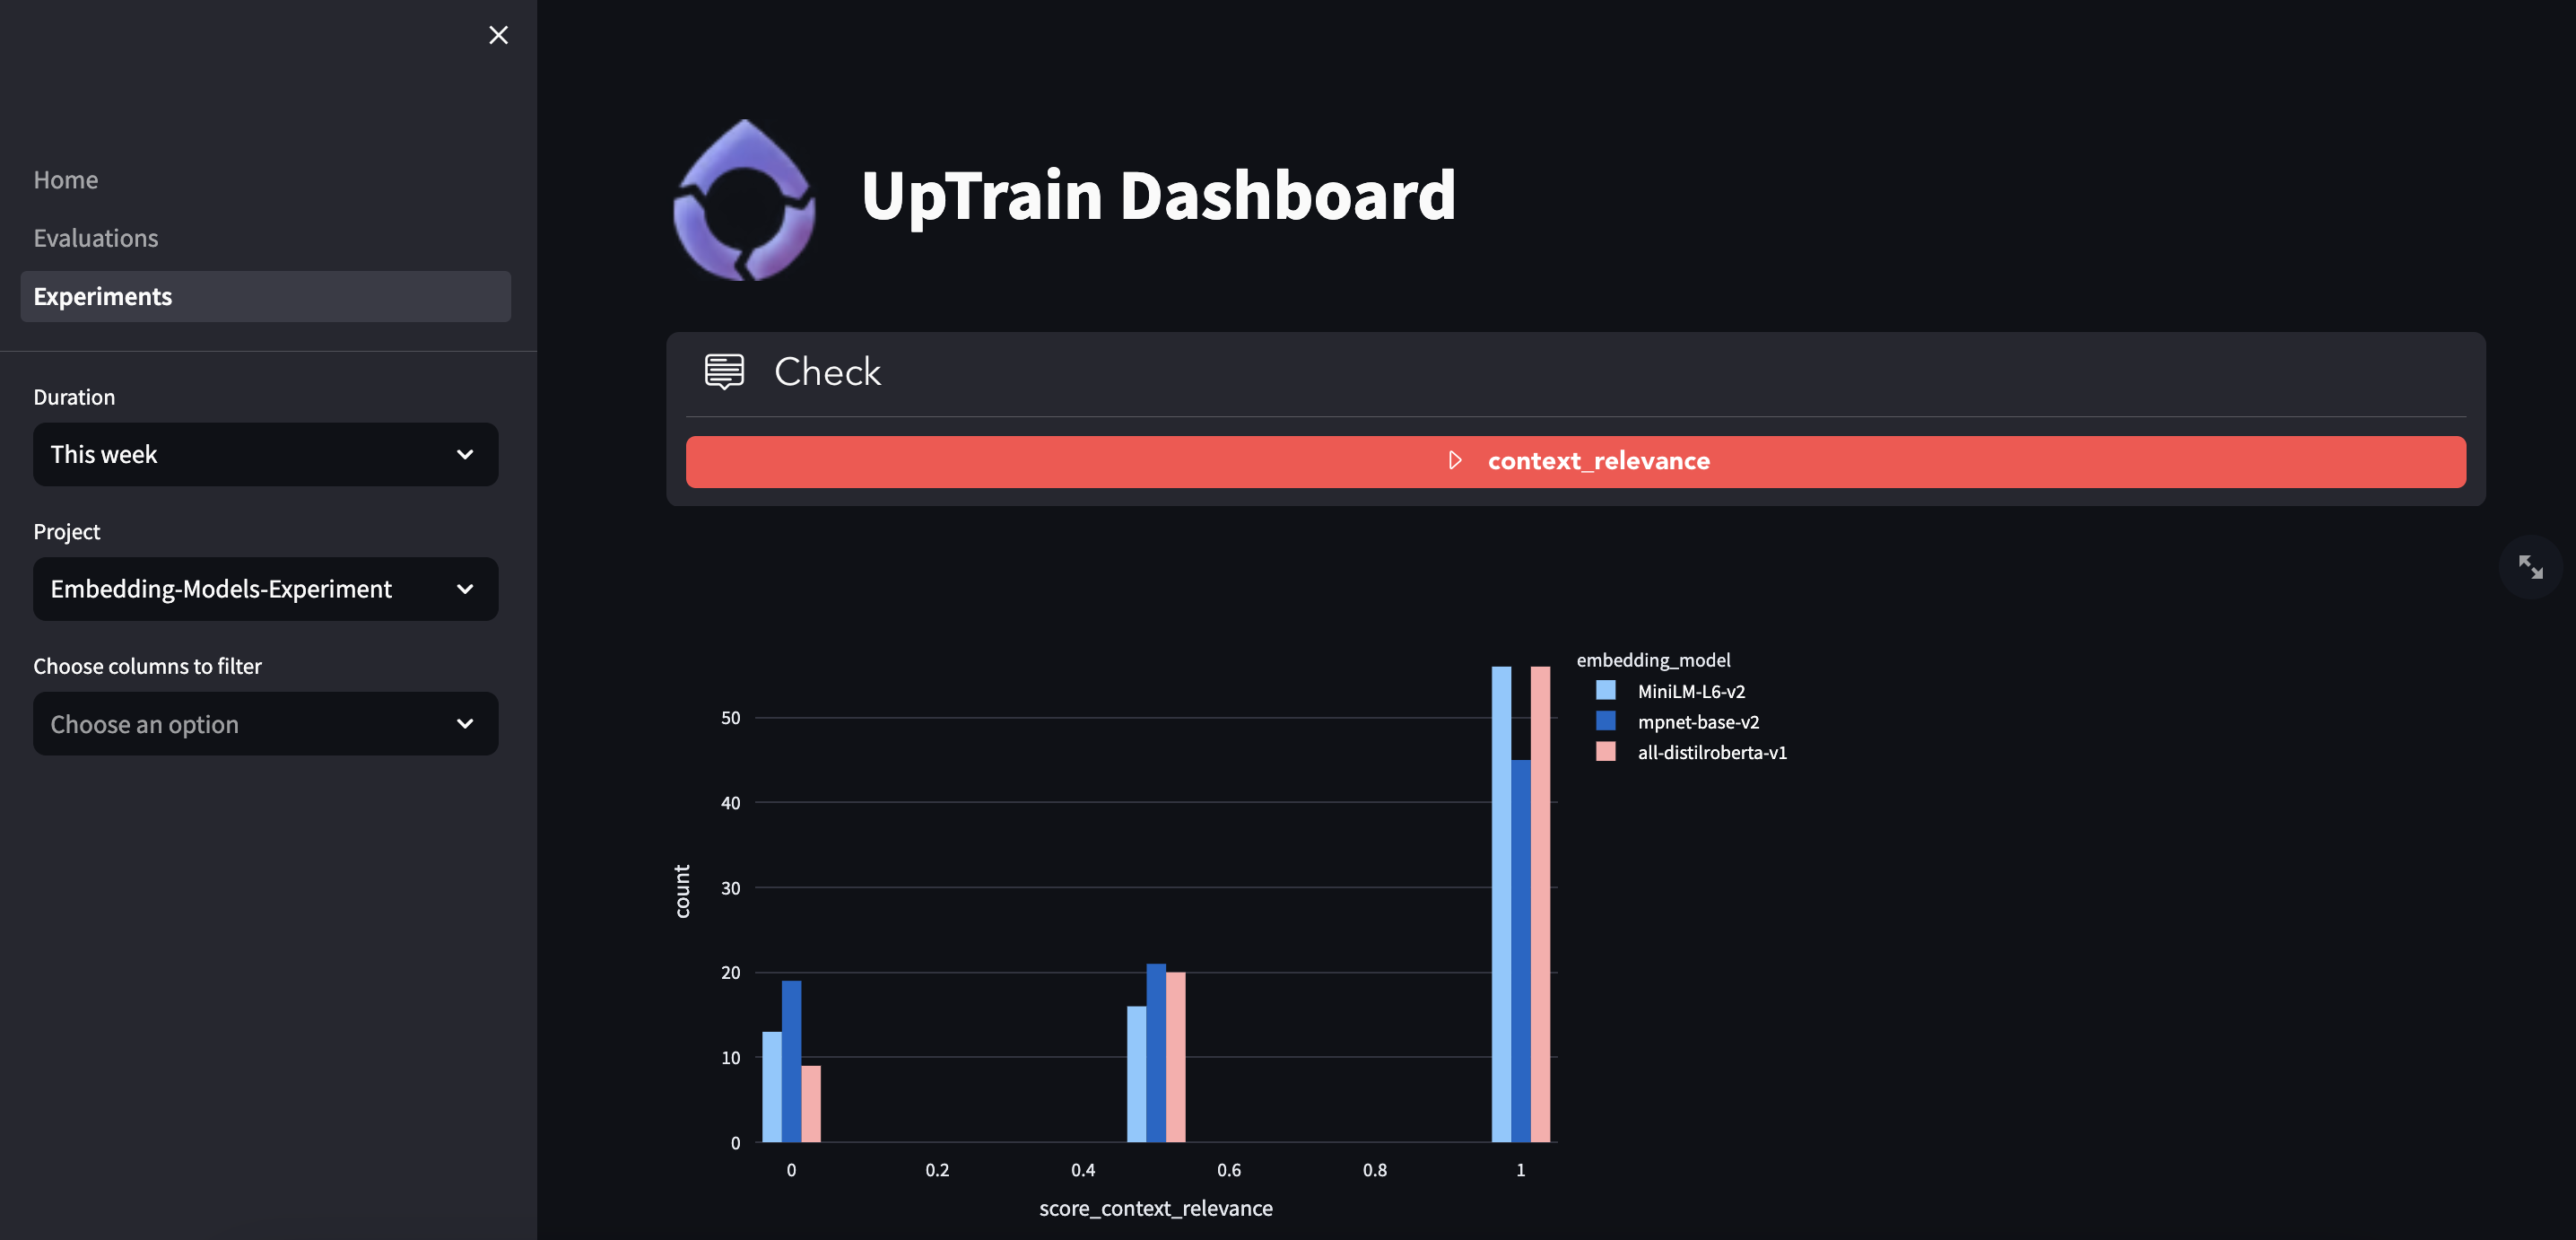